In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")
pd.options.display.float_format = "{:.3f}".format
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
from matplotlib.ticker import FuncFormatter

In [2]:
data = pd.read_csv(r'PUBG\train_V2.csv')
data.shape

(4446966, 29)

In [3]:
data.head()

Id         groupId         matchId  assists  boosts  \
0  7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1  eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2  1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3  4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4  315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   

   damageDealt  DBNOs  headshotKills  heals  killPlace  ...  revives  \
0        0.000      0              0      0         60  ...        0   
1       91.470      0              0      0         57  ...        0   
2       68.000      0              0      0         47  ...        0   
3       32.900      0              0      0         75  ...        0   
4      100.000      0              0      0         45  ...        0   

   rideDistance  roadKills  swimDistance  teamKills vehicleDestroys  \
0         0.000          0         0.000          0               0   
1         0.004          0        11.040          0               0   
2         0.000          0         0.000          0               0   
3         0.000          0         0.000          0               0   
4         0.000          0         0.000          0               0   

   walkDistance  weaponsAcquired  winPoints  winPlacePerc  
0       244.800                1       1466         0.444  
1      1434.000                5          0         0.640  
2       161.800                2          0         0.775  
3       202.700                3          0         0.167  
4        49.750                2          0         0.188  

[5 rows x 29 columns]

In [4]:
# mean dmg dealt ppl with kills and without kills
# number of headshot per kill
# kill strikes
# assists

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


* __groupId__ - identify of group in a match.
* __matchId__ - identify match. 
* __assists__ - Enemies that player damaged which were killed by other player form team.
* __boosts__ - boost items used
* __damageDealt__ 
* __DBNOs__ - knocked enemies.
* __headshotKills__ - Enemies killed by HS
* __heals__ - Healing items used.
* __killPlace__ - Ranki in match by enemies killed.
* __killPoints__ - Rank by kills
* __kills__ - Enemies killed
* __killStreaks__ - Enemies killed in shor time.
* __longestKill__ 
* __maxPlace__ - Worst placement 
* __numGroups__ - Number of groups we have data for in the match.
* __revives__ - Number of times this player revived teammates.
* __rideDistance__ - Distance traveled in vehicles meters.
* __roadKills__ - Kills while in a vehicle.
* __swimDistance__ - Distance swimmed meters
* __teamKills__ - Teammate killed times
* __vehicleDestroys__ - Destroyed vehicles. 
* __walkDistance__ - Distance walked meters
* __weaponsAcquired__ - Weapons 
* __winPoints__ - Rank based on wins
* __winPlacePerc__ - The target of prediction. 

In [6]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
print(f'Average number of kills by player in single match is: ',round(data['kills'].mean(),2))
print('Max kills in single match is: ',data['kills'].max())

Average number of kills by player in single match is:  0.92
Max kills in single match is:  72


## Kills Analysis 

In [8]:
def kills_grouped(x):
    if x == 0:
        return '0 kills'
    elif x >= 1 and x <=3:
        return '1-3 kills'
    elif x >= 4 and x <=5:
        return '4-5 kills'
    elif x >= 6 and x <=9:
        return '6-9 kills'
    elif x >= 10 and x <=20:
        return '10-20 kills'
    elif x >= 20 and x <=50:
        return '20-50 kills'
    else:
        return '+50 kills'

    
def typee(x):
    if ('solo' in x):
        return 'solo'
    elif ('duo' in x):
        return 'duo'
    else:
        return 'squad'
def millions(x, pos):
    return '%1.1fM' % (x*1e-6)

In [9]:
data['kills_grouped'] = data['kills'].apply(lambda x: kills_grouped(x))
data['mtype'] = data['matchType'].apply(lambda x: typee(x))
formatter = FuncFormatter(millions)

In [10]:
dfk = pd.concat([data.groupby('kills_grouped')['Id'].count().sort_values(ascending=False),data.groupby('kills_grouped')['Id'].count().sort_values(ascending=False)/data.shape[0]],axis=1).reset_index()
dfk.columns = ['kills_grouped','count', 'percent']

In [11]:
dfk

kills_grouped    count  percent
0       0 kills  2529722    0.569
1     1-3 kills  1632986    0.367
2     4-5 kills   191120    0.043
3     6-9 kills    80199    0.018
4   10-20 kills    12476    0.003
5   20-50 kills      450    0.000
6     +50 kills       13    0.000

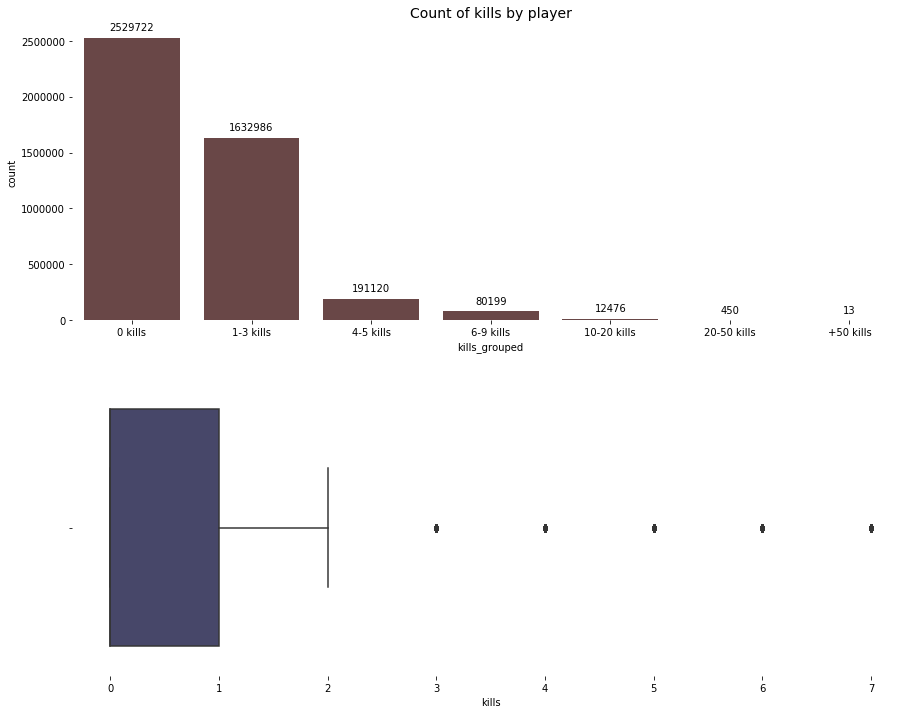

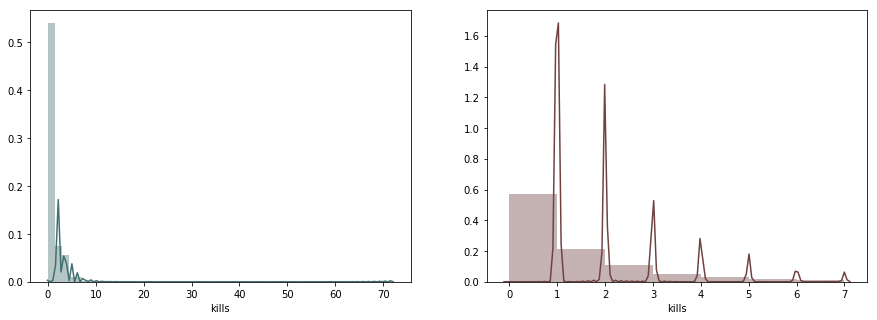

In [12]:
f,ax = plt.subplots(2,1,figsize=(15,12))
a1 = sns.countplot(data['kills_grouped'],palette=['#6F4141'],ax=ax[0])
a1.set_title('Count of kills by player',fontsize=14);
sns.despine(bottom=True, left=True)
for p in a1.patches:
    a1.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
a2 = sns.boxplot(data[data['kills']<=data['kills'].quantile(0.99)]['kills'], palette=['#41416f'],ax=ax[1])

f,ax = plt.subplots(1,2,figsize=(15,5))
a3 = sns.distplot(data['kills'],ax=ax[0],color='#416f6f');
a4 = sns.distplot(data[data['kills']<=data['kills'].quantile(0.99)]['kills'],ax=ax[1],color='#6F4141',bins=7);

In [13]:
pd.DataFrame(data['kills'].describe()).T

count  mean   std   min   25%   50%   75%    max
kills 4446966.000 0.925 1.558 0.000 0.000 0.000 1.000 72.000

In [14]:
data['kills'].quantile(0.95)

4.0

In [15]:
g = sns.jointplot(x="winPlacePerc", y="kills", data=data, height=12, ratio=3,color="#E5989B")
g.fig.suptitle('Win placement vs number of kills',fontsize=15);

In [16]:
data.groupby('mtype')['winPlacePerc'].agg('mean').reset_index().T

0     1      2
mtype          duo  solo  squad
winPlacePerc 0.485 0.487  0.462

In [17]:
data.groupby('kills_grouped')['winPlacePerc'].agg('mean').reset_index().T

0        1          2            3            4  \
kills_grouped  +50 kills  0 kills  1-3 kills  10-20 kills  20-50 kills   
winPlacePerc       0.966    0.370      0.571        0.904        0.837   

                       5          6  
kills_grouped  4-5 kills  6-9 kills  
winPlacePerc       0.790      0.876

In [18]:
f,ax = plt.subplots(1,2,figsize=(15,4),sharey=True)
sns.boxplot(x='mtype',y='winPlacePerc',data=data,ax=ax[0],palette=['#c55572'],width=0.4,linewidth=0.5)
sns.boxplot(x='kills_grouped',y='winPlacePerc',data=data,ax=ax[1],palette=['#b3b7b8'],width=0.6,linewidth=0.5)
plt.suptitle('Win percent by match Type & number of kills',fontsize=14);
sns.despine(bottom=True,left=True)

In [19]:
f,ax = plt.subplots(1,2,figsize=(15,5))
a0 =  sns.barplot(x='mtype',y='mean',data=data.groupby('mtype')['kills'].agg(['mean','sum']).reset_index(),ax=ax[1],palette=['#6D6875','#B5838D','#FFCDB2'])
a0.set_ylim(0.8,0.96)
a01 = sns.barplot(x='mtype',y='sum',data=data.groupby('mtype')['kills'].agg(['mean','sum']).reset_index(),ax=ax[0],palette=['#7E008F','#936A97','#5CBAB4'])
sns.despine(bottom=True, left=True)
for p in a0.patches:
    a0.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
for p in a01.patches:
    a01.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.suptitle('Sum of kills by match Type & Average number of kills by match type',fontsize=14);

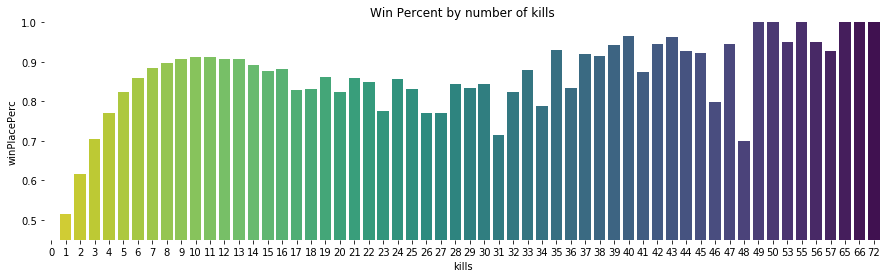

In [20]:
f,ax = plt.subplots(figsize=(15,4))
aoo = sns.barplot(x='kills',y='winPlacePerc',data=data.groupby('kills')['winPlacePerc'].mean().reset_index(),palette='viridis_r')
aoo.set_title('Win Percent by number of kills');
aoo.set_ylim(0.45,1)
sns.despine(bottom=True, left=True)

* In all dataset players made almost 4,5 KK kills.
* Almost 57% of players in single match didn't make any kill
* 75% of players made 0 or 1 kills 
* 95% made <= 4 kills
* We can say that more then 10 kills is outlier :) There is like 15k of more then 10 kills
* We can say that people who play with friends made most kills. But players who join match solo has biggest average number of kills. But average number of kills was very similar in three groups 

In [21]:
pd.DataFrame(data.corr()['kills'].sort_values(ascending=False)).T

kills  damageDealt  killStreaks  DBNOs  headshotKills  longestKill  \
kills  1.000        0.889        0.803  0.708          0.674        0.603   

       boosts  winPlacePerc  walkDistance  weaponsAcquired  ...  roadKills  \
kills   0.502         0.420         0.375            0.336  ...      0.064   

       swimDistance  killPoints  teamKills  rankPoints  winPoints  numGroups  \
kills         0.039       0.036      0.018       0.008      0.007     -0.004   

       maxPlace  matchDuration  killPlace  
kills    -0.005         -0.031     -0.730  

[1 rows x 25 columns]

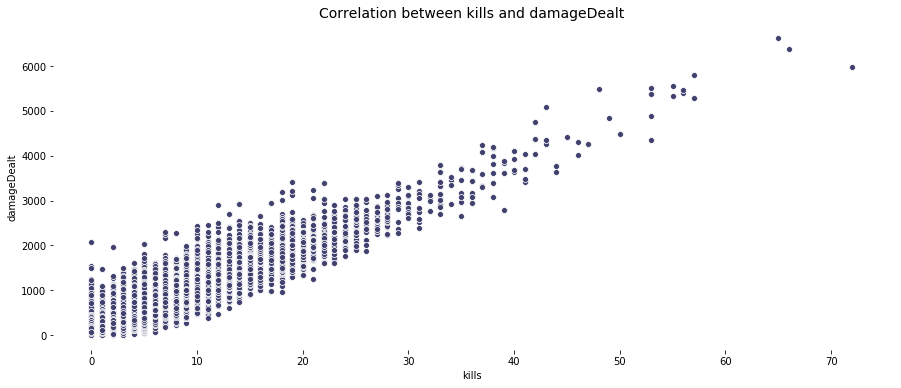

In [22]:
f,ax = plt.subplots(figsize=(15,6))
a5=sns.scatterplot(x=data['kills'],y=data['damageDealt']
                ,color='#41416f')
a5.set_title('Correlation between kills and damageDealt',fontsize=14);
sns.despine(bottom=True, left=True)

In [23]:
kills_0, kills_m = data[data['kills']==0], data[data['kills']>=1]

In [24]:
data.groupby('kills_grouped')['damageDealt'].mean().sort_values(ascending=False).reset_index()

kills_grouped  damageDealt
0     +50 kills     5535.769
1   20-50 kills     2568.529
2   10-20 kills     1199.095
3     6-9 kills      711.481
4     4-5 kills      463.882
5     1-3 kills      193.808
6       0 kills       40.678

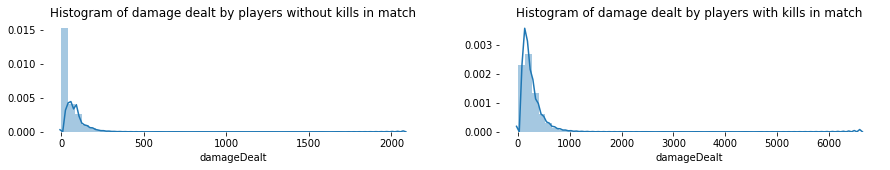

In [25]:
f,ax = plt.subplots(figsize=(15,6))
b1 = sns.barplot(x='kills_grouped',y='damageDealt',
                 data=data.groupby('kills_grouped')['damageDealt'].mean().sort_values(ascending=False).reset_index(),palette='viridis')
sns.despine(bottom=True, left=True)
f,ax = plt.subplots(1,2,figsize=(15,2))
b2 = sns.distplot(kills_0['damageDealt'],bins=50,ax=ax[0])
b2.set_title('Histogram of damage dealt by players without kills in match');
b3 = sns.distplot(kills_m['damageDealt'],bins=50,ax=ax[1]);
b3.set_title('Histogram of damage dealt by players with kills in match');
b1.set_title('Mean Damage Dealt by kills grouped');
sns.despine(bottom=True, left=True)

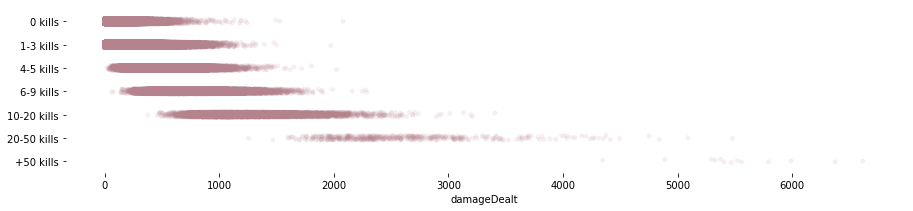

In [26]:
plt.figure(figsize=(15,3))
st3 = sns.stripplot(y='kills_grouped',x='damageDealt',data = data,
                   jitter=True, 
                   marker='o', 
                   alpha=0.12,
                   color='#B5838D')
st3.set_ylabel('');
sns.despine(left=True,bottom=True)

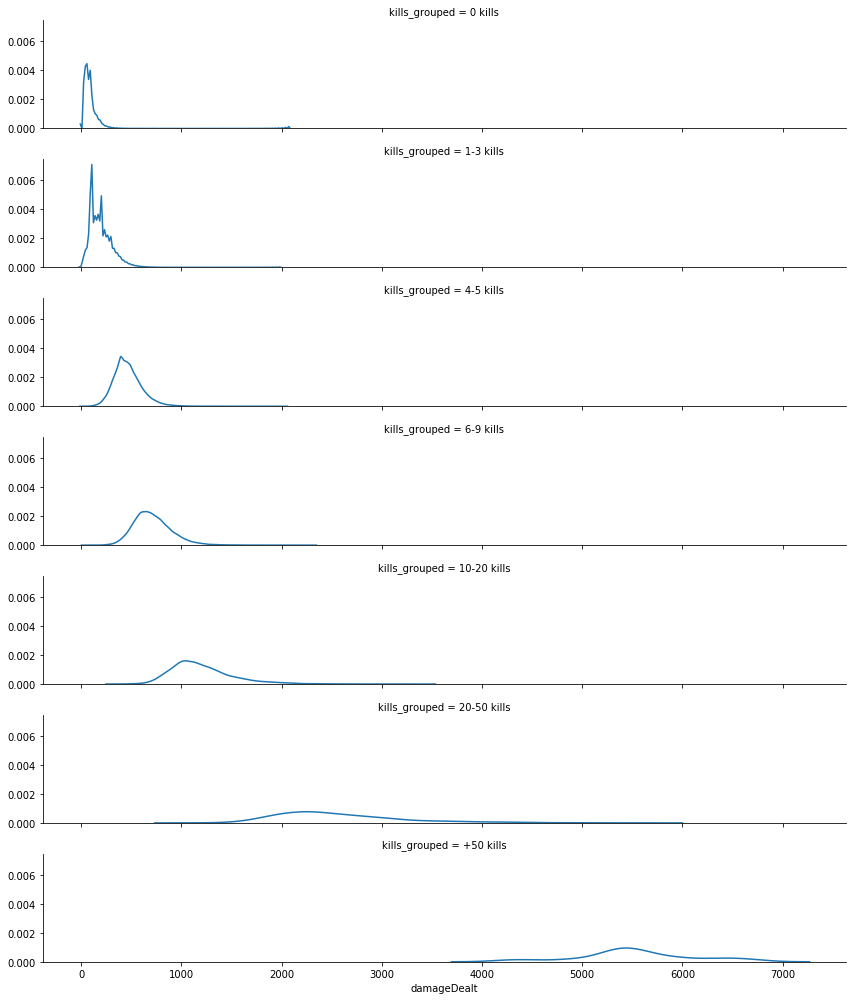

In [27]:
g = sns.FacetGrid(data, row="kills_grouped",
                  height=2, aspect=6)
g.map(sns.kdeplot, "damageDealt");

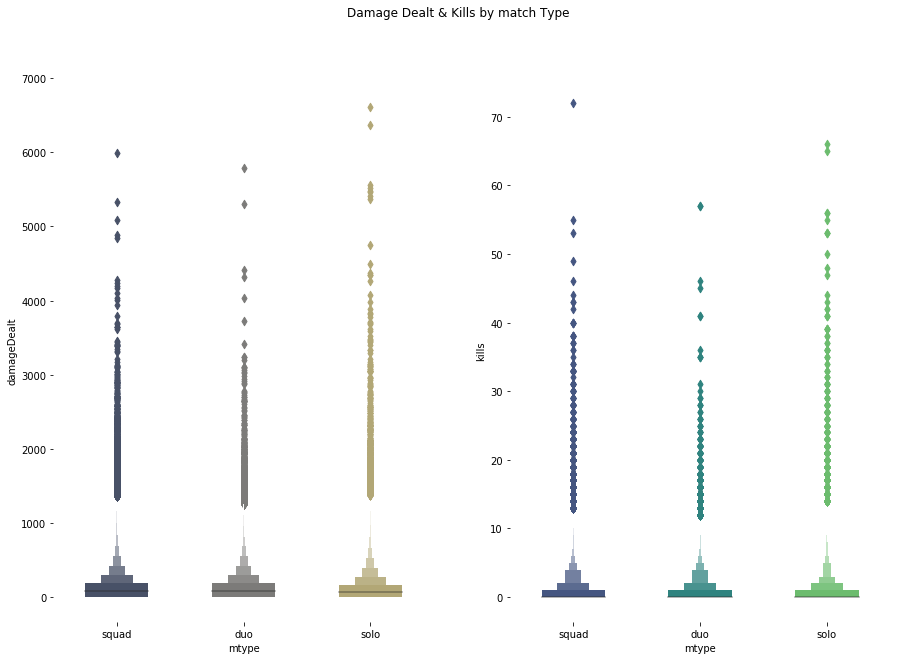

In [28]:
f,ax = plt.subplots(1,2,figsize=(15,10))
sns.boxenplot(x='mtype',y='damageDealt',data=data,ax=ax[0],palette='cividis',width=0.5)
sns.boxenplot(x='mtype',y='kills',data=data,ax=ax[1],palette='viridis',width=0.5)
plt.suptitle('Damage Dealt & Kills by match Type');
sns.despine(bottom=True, left=True)

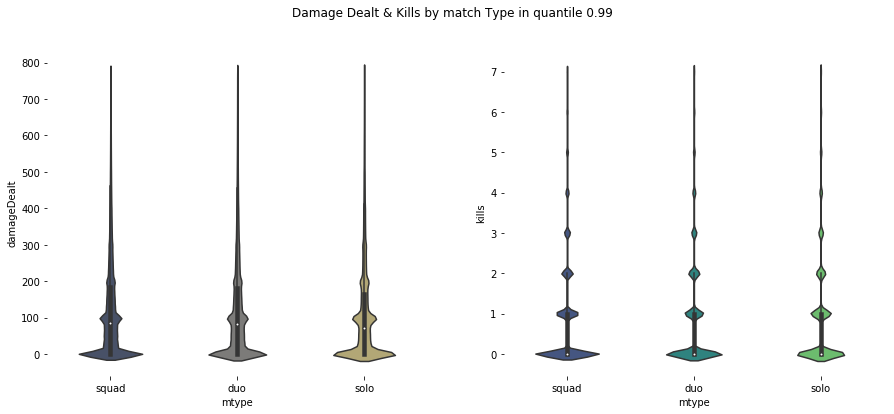

In [29]:
f,ax = plt.subplots(1,2,figsize=(15,6))
sns.violinplot(x='mtype',y='damageDealt',data=data[data['damageDealt']<=data['damageDealt'].quantile(0.99)],ax=ax[0],palette='cividis',width=0.5)
sns.violinplot(x='mtype',y='kills',data=data[data['kills']<=data['kills'].quantile(0.99)],ax=ax[1],palette='viridis',width=0.5)
plt.suptitle('Damage Dealt & Kills by match Type in quantile 0.99');
sns.despine(bottom=True, left=True)

In [30]:
data.groupby('mtype')['damageDealt'].agg(['mean','sum']).reset_index()

mtype    mean           sum
0    duo 131.392 172907482.996
1   solo 119.165  85884040.457
2  squad 133.803 322503144.399

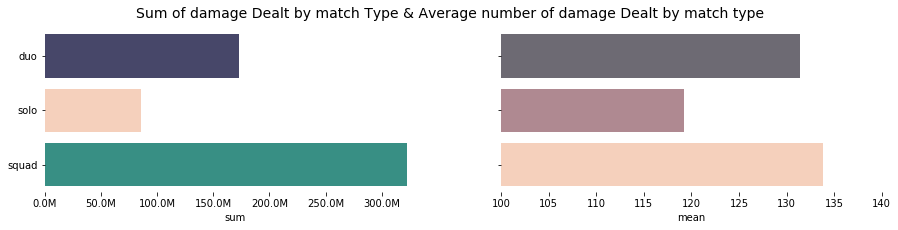

In [31]:
f,ax = plt.subplots(1,2,figsize=(15,3),sharey=True)
b0 =  sns.barplot(y='mtype',x='mean',data=data.groupby('mtype')['damageDealt'].agg(['mean','sum']).reset_index(),palette=['#6D6875','#B5838D','#FFCDB2'],ax=ax[1])
b0.set_xlim(100,140)
sns.despine(bottom=True, left=True)
b01 =  sns.barplot(y='mtype',x='sum',data=data.groupby('mtype')['damageDealt'].agg(['mean','sum']).reset_index(),palette=['#41416f','#FFCDB2','#2A9D8F'],ax=ax[0])
b01.set_ylabel('');
b0.set_ylabel('');
plt.suptitle('Sum of damage Dealt by match Type & Average number of damage Dealt by match type',fontsize=14);
b01.xaxis.set_major_formatter(formatter)

In [32]:
data.sample()

Id         groupId         matchId  assists  boosts  \
3509765  bfd93ddeb59b0e  90c9a36382f125  c9dab2bbf2be39        0       0   

         damageDealt  DBNOs  headshotKills  heals  killPlace  ...  roadKills  \
3509765       14.660      0              0      1         62  ...          0   

         swimDistance  teamKills  vehicleDestroys  walkDistance  \
3509765         0.000          0                0       418.500   

        weaponsAcquired  winPoints  winPlacePerc  kills_grouped  mtype  
3509765               2       1517         0.480        0 kills  squad  

[1 rows x 31 columns]

In [33]:
data[['kills','headshotKills']].sample(5)

kills  headshotKills
3731024      2              1
270831       0              0
1169666      0              0
461818       1              0
2484967      9              2

In [34]:
data['hs_kill'] = (data['headshotKills']/data['kills']).fillna(0)

In [35]:
print(f"Players made {data['kills'].sum()} kills, where HeadShots kills were {data['headshotKills'].sum()}.", f"\nSo we can say that {round(data['headshotKills'].sum()/data['kills'].sum()*100,2)} % were HS\'s")

Players made 4112480 kills, where HeadShots kills were 1008659. 
So we can say that 24.53 % were HS's


In [36]:
data.groupby('kills_grouped')['headshotKills'].agg(['sum','mean']).reset_index().T

0        1          2            3            4  \
kills_grouped  +50 kills  0 kills  1-3 kills  10-20 kills  20-50 kills   
sum                  278        0     610518        43236         3491   
mean              21.385    0.000      0.374        3.466        7.758   

                       5          6  
kills_grouped  4-5 kills  6-9 kills  
sum               206020     145116  
mean               1.078      1.809

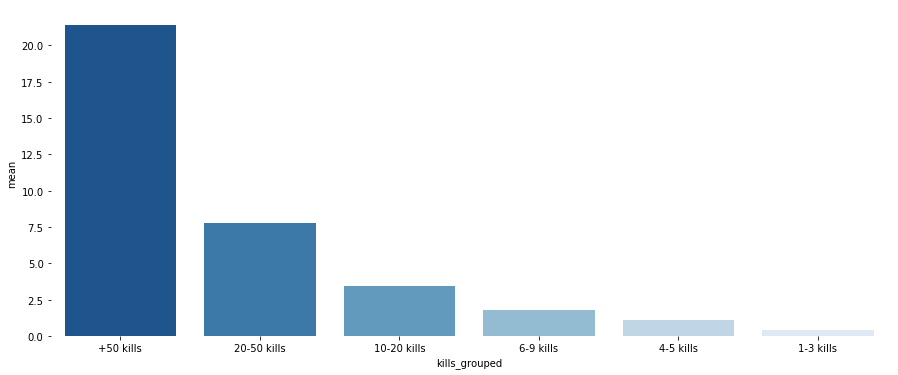

In [37]:
f,ax = plt.subplots(figsize=(15,6))
d1 = sns.barplot(x='kills_grouped',
                 y='mean',
                 data=data[data['kills']>0].groupby('kills_grouped')['headshotKills'].agg(['sum','mean']).reset_index().sort_values(by='mean',ascending=False),palette='Blues_r')
sns.despine(bottom=True, left=True)


In [38]:
data[data['kills']>0]['headshotKills'].describe()

count   1917244.000
mean          0.526
std           0.827
min           0.000
25%           0.000
50%           0.000
75%           1.000
max          64.000
Name: headshotKills, dtype: float64

In [39]:
df0 = data[data['kills']>0].groupby('kills')['headshotKills','kills'].sum().rename(columns={'kills':'Kills'}).reset_index()
df0['hs_ratio'] = df0['headshotKills']/df0['Kills']
df0.head()

kills  headshotKills   Kills  hs_ratio
0      1         218525  928079     0.235
1      2         223450  944932     0.236
2      3         168543  697323     0.242
3      4         122458  498172     0.246
4      5          83562  332885     0.251

In [40]:
df0_tidy = df0.drop('hs_ratio',axis=1).melt(id_vars='kills')

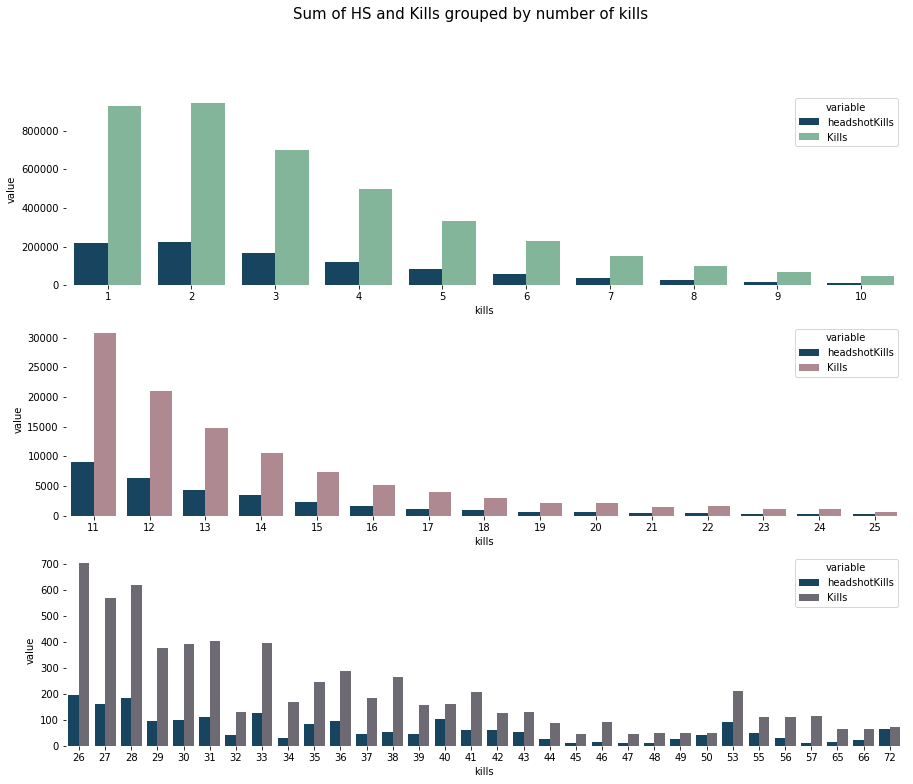

In [41]:
f,ax = plt.subplots(3,1,figsize=(15,12))

plt.suptitle('Sum of HS and Kills grouped by number of kills',fontsize=15);
e = sns.barplot(y='value',x='kills',hue='variable',data=df0_tidy[df0_tidy['kills']<=10],palette=['#0B486B','#79BD9A','#B5838D'],
               ax=ax[0])
e2 = sns.barplot(y='value',x='kills',hue='variable',data=df0_tidy[(df0_tidy['kills']>10)&(df0_tidy['kills']<=25)],palette=['#0B486B','#B5838D'],
               ax=ax[1])

e3 = sns.barplot(y='value',x='kills',hue='variable',data=df0_tidy[df0_tidy['kills']>25],palette=['#0B486B','#6D6875'],
               ax=ax[2])
#df0

sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)


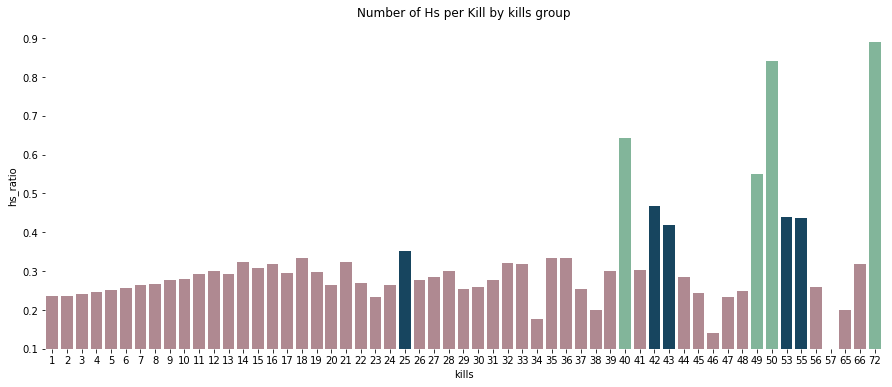

In [42]:
colls = []
for i in df0['hs_ratio']:
    if i >= 0.5:
        colls.append('#79BD9A')
    elif i >= 0.35:
        colls.append('#0B486B')
    else:
        colls.append('#B5838D')

f,ax = plt.subplots(figsize=(15,6))
e4 = sns.barplot(x='kills',
                 y='hs_ratio',
                 data=df0,palette=colls)
e4.set_ylim(0.1,0.94);
sns.despine(left=True, bottom=True)
e4.set_title('Number of Hs per Kill by kills group');

In [43]:
data.groupby('mtype')['headshotKills'].agg(['sum','mean']).reset_index()

mtype     sum  mean
0    duo  293706 0.223
1   solo  179660 0.249
2  squad  535293 0.222

In [44]:
df1 = data[data['kills']>0].groupby('mtype')['headshotKills','kills'].sum().rename(columns={'kills':'Kills'}).reset_index()
df1['hs_ratio'] = df0['headshotKills']/df0['Kills']
df1.head()

mtype  headshotKills    Kills  hs_ratio
0    duo         293706  1219251     0.235
1   solo         179660   675206     0.236
2  squad         535293  2218023     0.242

In [45]:
df1_tidy = df1.drop('hs_ratio',axis=1).melt(id_vars='mtype')

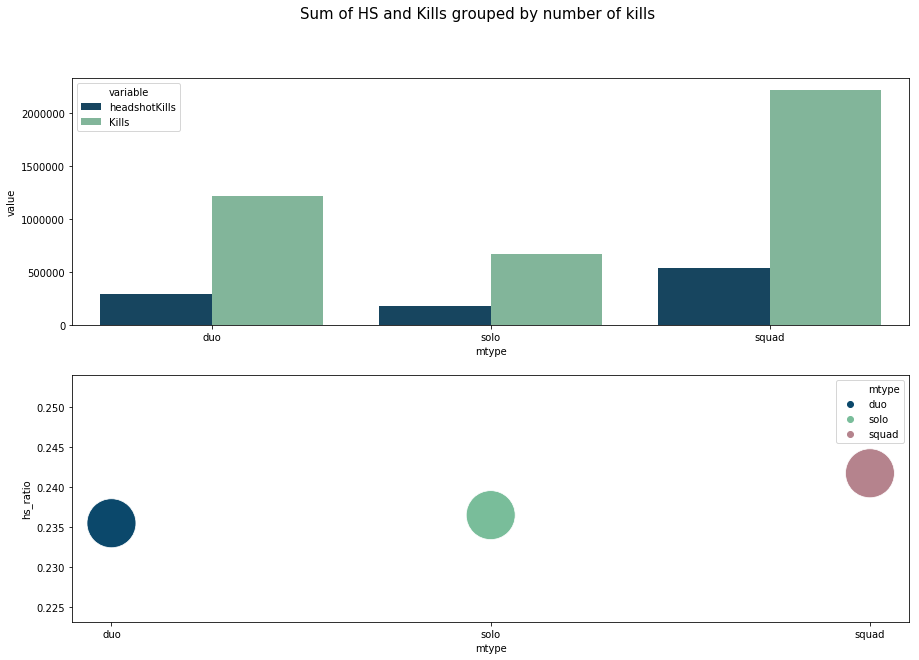

In [46]:
f,ax = plt.subplots(2,1,figsize=(15,10))
plt.suptitle('Sum of HS and Kills grouped by number of kills',fontsize=15);
f = sns.barplot(y='value',x='mtype',hue='variable',data=df1_tidy,palette=['#0B486B','#79BD9A','#B5838D'],
               ax=ax[0])
f0 = sns.scatterplot(y='hs_ratio',x='mtype',data=df1,ax=ax[1],s=2400,hue='mtype',palette=['#0B486B','#79BD9A','#B5838D'])

In [47]:
# players in group
player_groups = data.groupby(['matchId','groupId','mtype'])['Id'].count().to_frame('players_count').reset_index()
player_groups.loc[player_groups['players_count']>9,'players_count'] = '10+'
player_groups['players_count'] = player_groups['players_count'].astype(str)
player_groups['players_count'].value_counts() 

1      792277
2      654211
3      247137
4      217540
5       53426
6       25875
7       14788
8        8422
10+      8237
9        4832
Name: players_count, dtype: int64

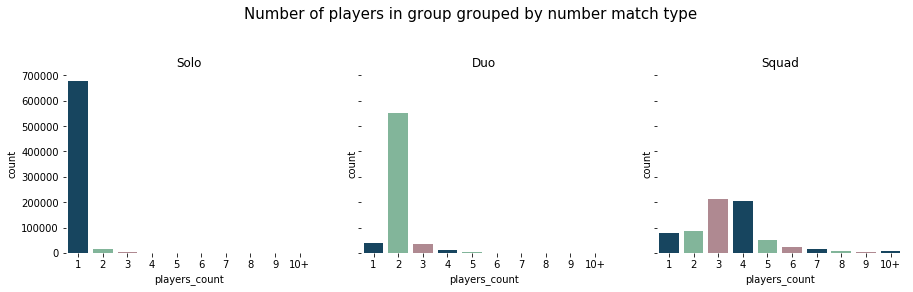

In [48]:
f,ax = plt.subplots(1,3,figsize=(15,4),sharey=True)
f.subplots_adjust(top=0.75)
plt.suptitle('Number of players in group grouped by number match type',fontsize=15);
co1 = sns.countplot(x='players_count',
              data=player_groups[player_groups['mtype']=='solo'],
              order=['1','2','3','4','5','6','7','8','9','10+'],palette=['#0B486B','#79BD9A','#B5838D'],ax=ax[0] )
co1.set_title('Solo');
co2 = sns.countplot(x='players_count',
              data=player_groups[player_groups['mtype']=='duo'],
              order=['1','2','3','4','5','6','7','8','9','10+'],palette=['#0B486B','#79BD9A','#B5838D'],ax=ax[1] )
co2.set_title('Duo');
co3 = sns.countplot(x='players_count',
              data=player_groups[player_groups['mtype']=='squad'],
              order=['1','2','3','4','5','6','7','8','9','10+'],palette=['#0B486B','#79BD9A','#B5838D'],ax=ax[2] )
co3.set_title('Squad');
sns.despine(left=True, bottom=True)


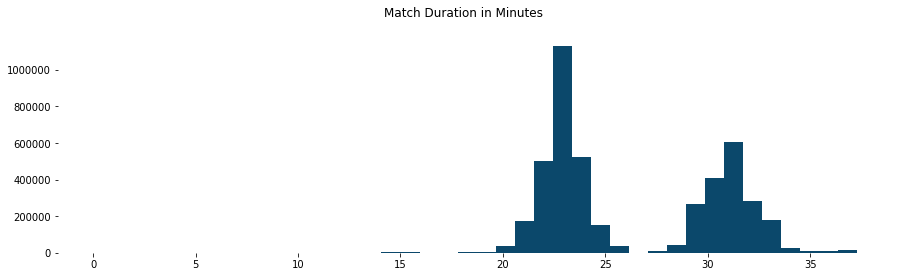

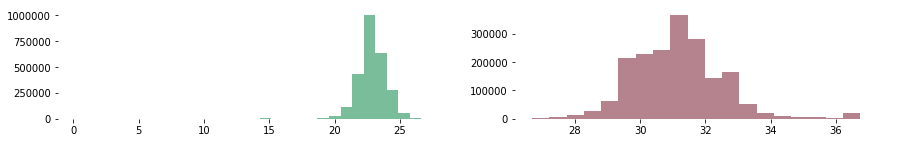

In [49]:
data['matchDuration_minutes'] = data['matchDuration']/60
f,ax = plt.subplots(figsize=(15,4))
h1=data['matchDuration_minutes'].hist(bins=40,color='#0B486B')
h1.grid(False)
plt.suptitle('Match Duration in Minutes',fontsize=12);
sns.despine(left=True, bottom=True)
d1,d2  = data[data['matchDuration']<1600], data[data['matchDuration']>=1600]
f,ax = plt.subplots(1,2,figsize=(15,2))
h2 = d1['matchDuration_minutes'].hist(bins=30,ax=ax[0],color='#79BD9A')
h3 = d2['matchDuration_minutes'].hist(bins=20,ax=ax[1],color='#B5838D')

sns.despine(left=True, bottom=True)
h2.grid(False)
h3.grid(False)

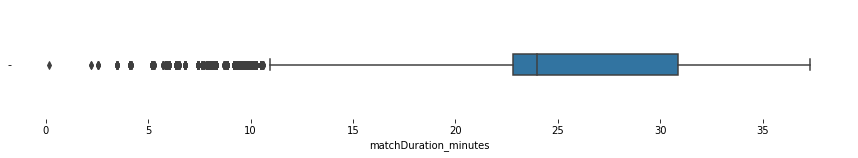

In [50]:
f,ax = plt.subplots(figsize=(15,2))
sns.boxplot(data['matchDuration_minutes'],width=0.2)
sns.despine(left=True, bottom=True)
plt.figure(figsize=(15,3))
st4 = sns.stripplot(y='mtype',x='matchDuration_minutes',data = data,
                   jitter=True, 
                   marker='o', 
                   alpha=0.12,
                   color='#0B486B')
st4.set_ylabel('');
sns.despine(left=True,bottom=True)

In [51]:
g = sns.FacetGrid(data, row="kills_grouped",
                  height=2, aspect=6)
g.map(sns.kdeplot, "matchDuration_minutes");

In [52]:
data['matchDuration_minutes'].describe().to_frame().T

count   mean   std   min    25%    50%    75%  \
matchDuration_minutes 4446966.000 26.325 4.312 0.150 22.783 23.967 30.850   

                         max  
matchDuration_minutes 37.283

In [53]:
data.groupby('mtype')['matchDuration_minutes'].agg(['mean','std']).T

mtype    duo   solo  squad
mean  26.589 26.677 26.076
std    4.259  4.284  4.334

In [54]:
data.groupby('kills_grouped')['matchDuration_minutes'].agg(['mean','std']).T

kills_grouped  +50 kills  0 kills  1-3 kills  10-20 kills  20-50 kills  \
mean              27.332   26.428     26.212       24.729       22.344   
std                5.353    4.298      4.283        5.814        6.750   

kills_grouped  4-5 kills  6-9 kills  
mean              26.183     25.987  
std                4.391      4.707

In [55]:
data.corr()['winPlacePerc'].to_frame().T

assists  boosts  damageDealt  DBNOs  headshotKills  heals  \
winPlacePerc    0.299   0.634        0.441  0.280          0.278  0.428   

              killPlace  killPoints  kills  killStreaks  ...  roadKills  \
winPlacePerc     -0.719       0.013  0.420        0.378  ...      0.035   

              swimDistance  teamKills  vehicleDestroys  walkDistance  \
winPlacePerc         0.150      0.016            0.073         0.811   

              weaponsAcquired  winPoints  winPlacePerc  hs_kill  \
winPlacePerc            0.584      0.007         1.000    0.181   

              matchDuration_minutes  
winPlacePerc                 -0.005  

[1 rows x 27 columns]

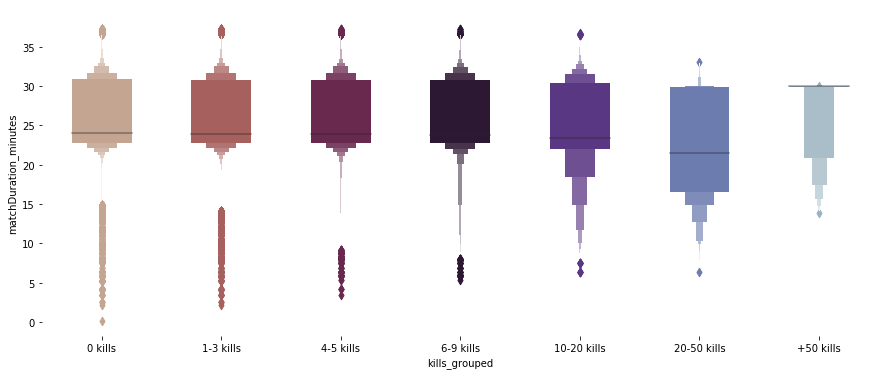

In [56]:
f,ax = plt.subplots(figsize=(15,6))
sns.boxenplot(y = data['matchDuration_minutes'],x='kills_grouped',width=0.5,data=data,palette='twilight_r')
sns.despine(left=True, bottom=True)

* Mean match duration is 26 minutes.
* Mean match duration by matchType is very simillar in range (26-27 minutes)
* 75% of matches were shorter then 31 minutes.
* If we check match duration by number of kills we can say that longer match is not equal more kills

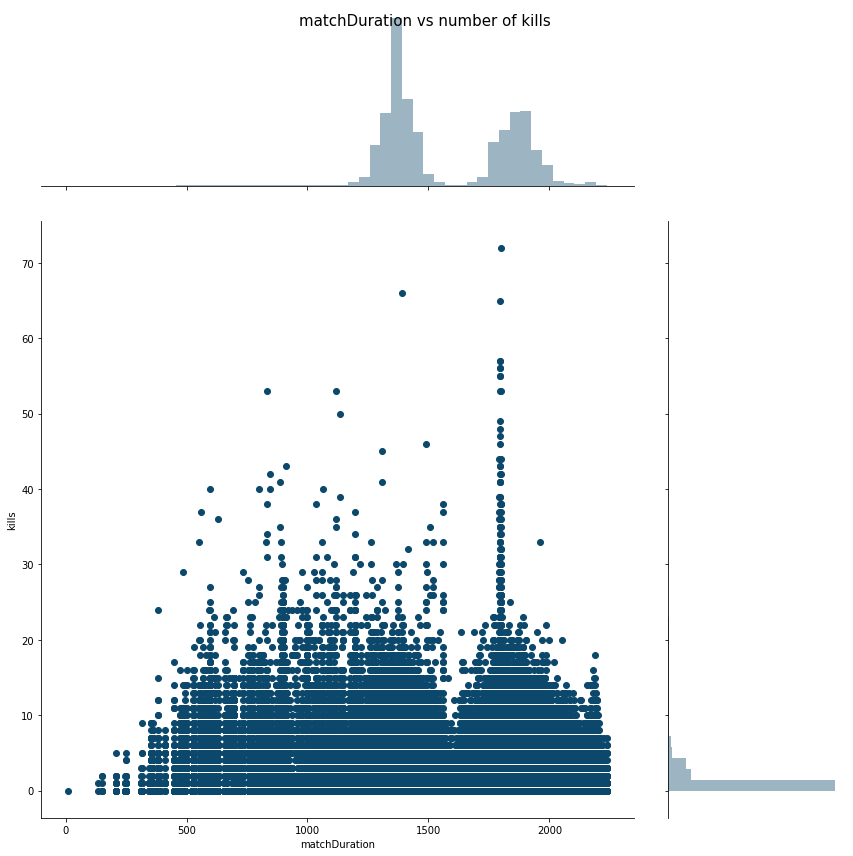

In [57]:
g = sns.jointplot(x="matchDuration", y="kills", data=data, height=12, ratio=3,color="#0B486B")
g.fig.suptitle('matchDuration vs number of kills',fontsize=15);

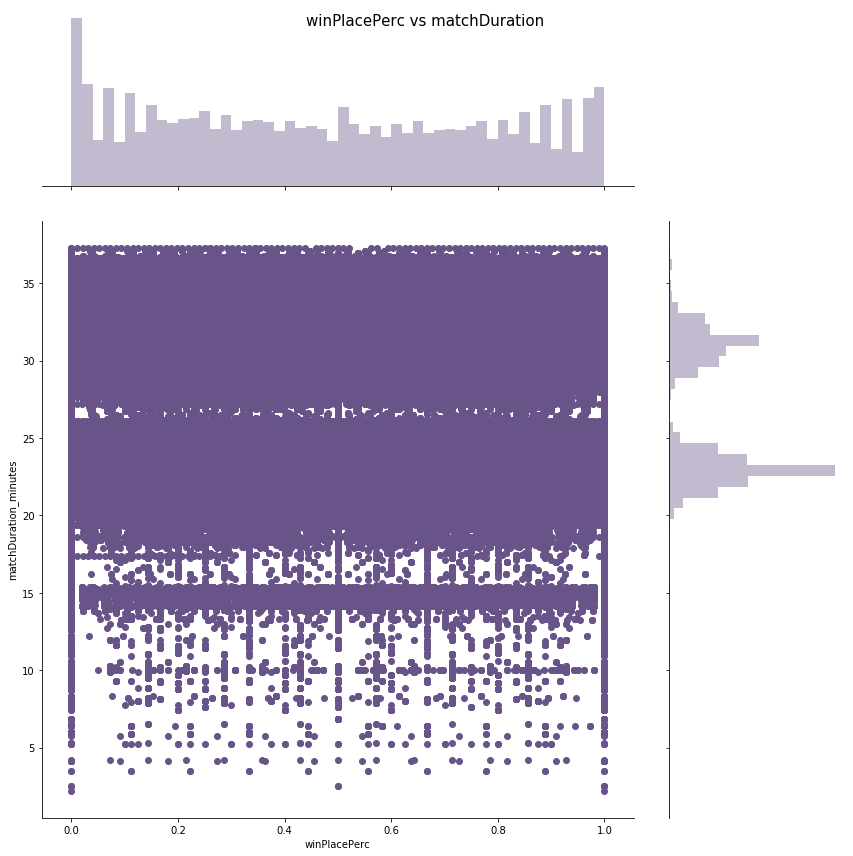

In [58]:
g = sns.jointplot(x="winPlacePerc", y="matchDuration_minutes", data=data, height=12, ratio=3,color="#685489")
g.fig.suptitle('winPlacePerc vs matchDuration',fontsize=15);

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


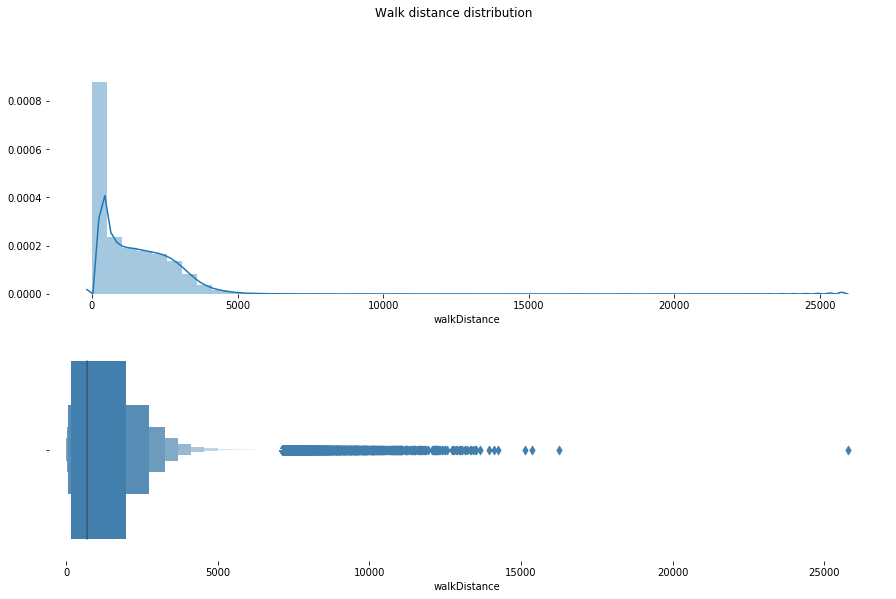

In [59]:
f,ax = plt.subplots(2,1,figsize=(15,9))
h1=sns.distplot(data['walkDistance'],ax=ax[0])
h1.grid(False)
plt.suptitle('Walk distance distribution',fontsize=12);
sns.despine(left=True, bottom=True)
h2=sns.boxenplot(x=data['walkDistance'],ax=ax[1],palette='tab20c')

In [60]:
data['walkDistance'].describe().to_frame().T

count     mean      std   min     25%     50%      75%  \
walkDistance 4446966.000 1154.218 1183.497 0.000 155.100 685.600 1976.000   

                   max  
walkDistance 25780.000

In [61]:
f,ax = plt.subplots(figsize=(15,5))
h4= data[(data['walkDistance']<data['walkDistance'].quantile(0.99)) & (data['walkDistance']>=1 )]['walkDistance'].hist(bins=400,color='#633243')
h4.grid(False)

In [62]:
print('There are',data[data['walkDistance']==0]['Id'].count(),
      'players who walked 0 meters. They were probably away from keybord','It\'s almost 2,25 % of players',)

There are 99603 players who walked 0 meters. They were probably away from keybord It's almost 2,25 % of players


In [63]:
data.groupby('mtype')['walkDistance'].agg(['mean']).T

mtype      duo    solo    squad
mean  1111.119 955.351 1237.213

In [64]:
data.groupby('kills_grouped')['walkDistance'].agg(['mean']).T

kills_grouped  +50 kills  0 kills  1-3 kills  10-20 kills  20-50 kills  \
mean             599.624  822.910   1447.651     2633.276      780.255   

kills_grouped  4-5 kills  6-9 kills  
mean            2298.413   2675.286

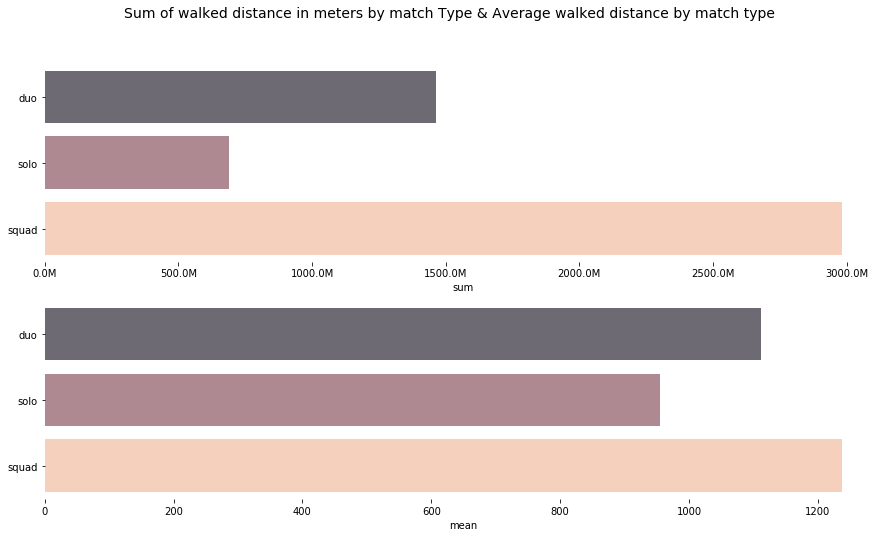

In [65]:
f,ax = plt.subplots(2,1,figsize=(15,8),sharey=True)
b0 =  sns.barplot(y='mtype',x='mean',data=data.groupby('mtype')['walkDistance'].agg(['mean','sum']).reset_index(),palette=['#6D6875','#B5838D','#FFCDB2'],ax=ax[1])
sns.despine(bottom=True, left=True)
b01 =  sns.barplot(y='mtype',x='sum',data=data.groupby('mtype')['walkDistance'].agg(['mean','sum']).reset_index(),palette=['#6D6875','#B5838D','#FFCDB2'],ax=ax[0])
b01.set_ylabel('');
b0.set_ylabel('');
plt.suptitle('Sum of walked distance in meters by match Type & Average walked distance by match type',fontsize=14);
b01.xaxis.set_major_formatter(formatter)

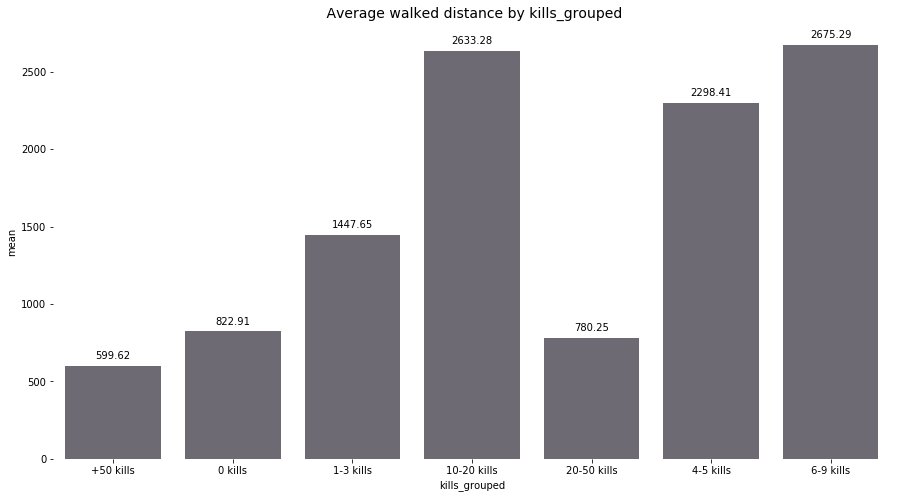

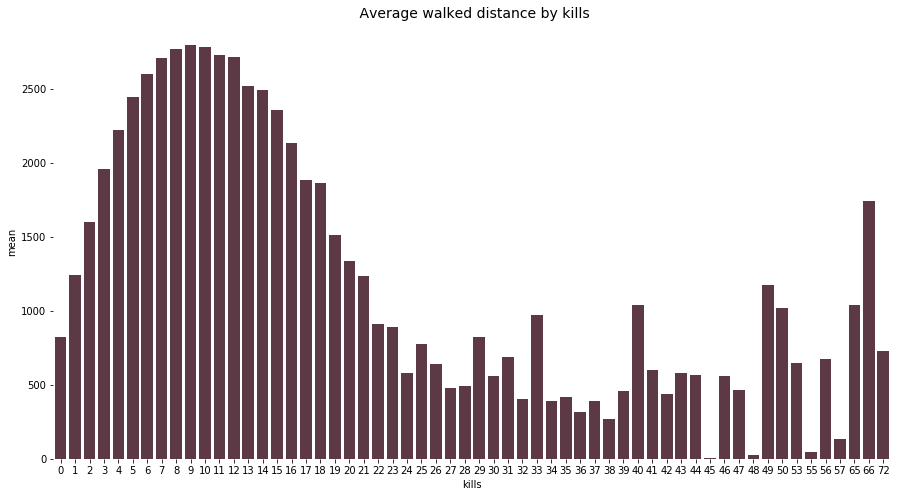

In [66]:
f,ax = plt.subplots(figsize=(15,8))
b0 =  sns.barplot(x='kills_grouped',y='mean',data=data.groupby('kills_grouped')['walkDistance'].agg(['mean','sum']).reset_index(),palette=['#6D6875'])
sns.despine(bottom=True, left=True)
plt.title(' Average walked distance by kills_grouped',fontsize=14);
for p in b0.patches:
    b0.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
f,ax = plt.subplots(figsize=(15,8))
b0x =  sns.barplot(x='kills',y='mean',data=data.groupby('kills')['walkDistance'].agg(['mean','sum']).reset_index(),palette=['#633243'])
sns.despine(bottom=True, left=True)
plt.title(' Average walked distance by kills',fontsize=14);


In [67]:
data['rideDistance'].describe().to_frame().T

count    mean      std   min   25%   50%   75%       max
rideDistance 4446966.000 606.116 1498.344 0.000 0.000 0.000 0.191 40710.000

In [68]:
data['rideDistance'].quantile(0.99)

6966.0

In [69]:
data[data['rideDistance']==0]['rideDistance'].describe().to_frame().T

count  mean   std   min   25%   50%   75%   max
rideDistance 3309429.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000

In [70]:
print(data[data['rideDistance']==0]['Id'].count()/data.shape[0]*100,' % of players didn\'t ride on any vehicle')

74.4199303525145  % of players didn't ride on any vehicle


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


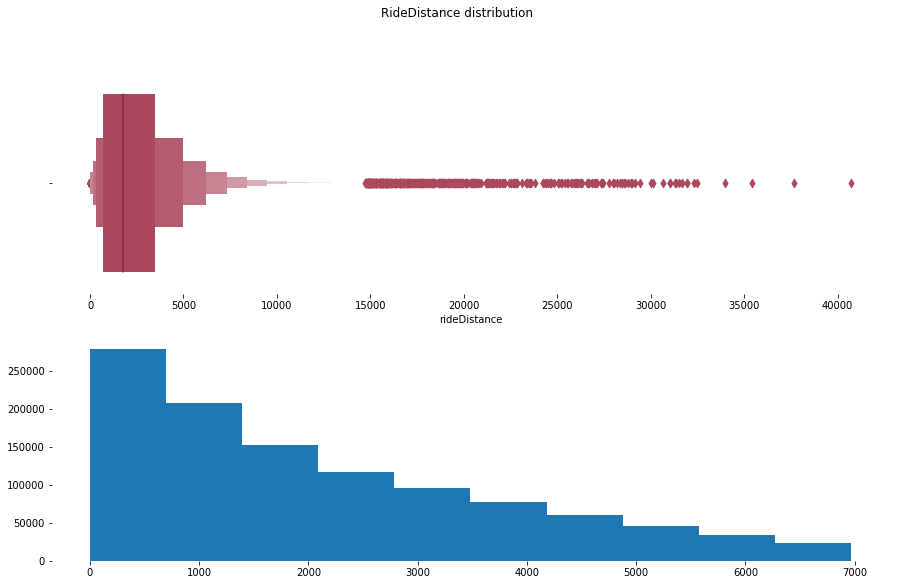

In [71]:
f,ax = plt.subplots(2,1,figsize=(15,9))
h1=(data[(data['rideDistance']!=0) & (data['rideDistance']<data['rideDistance'].quantile(0.99))]['rideDistance']).hist(ax=ax[1])
h1.grid(False)
plt.suptitle('RideDistance distribution',fontsize=12);
sns.despine(left=True, bottom=True)
h2=sns.boxenplot(x=data[data['rideDistance']>0]['rideDistance'],ax=ax[0],palette='inferno')

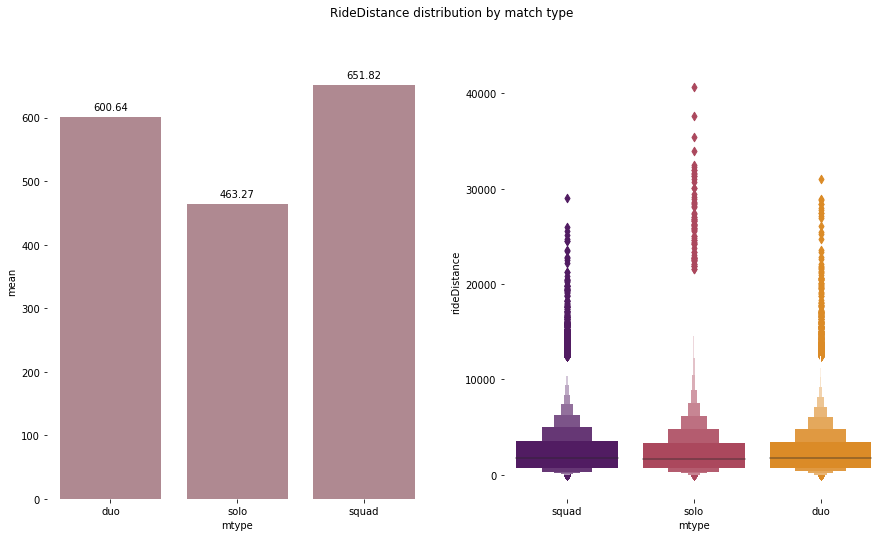

In [72]:
f,ax = plt.subplots(1,2,figsize=(15,8))
d0 =  sns.barplot(x='mtype',y='mean',data=data.groupby('mtype')['rideDistance'].agg(['mean','sum']).reset_index(),palette=['#B5838D'],ax=ax[0])
sns.despine(bottom=True, left=True)
for p in d0.patches:
    d0.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
d1 = sns.boxenplot(y='rideDistance',data=data[data['rideDistance']>0],x='mtype',palette='inferno',ax=ax[1])
plt.suptitle('RideDistance distribution by match type',fontsize=12);


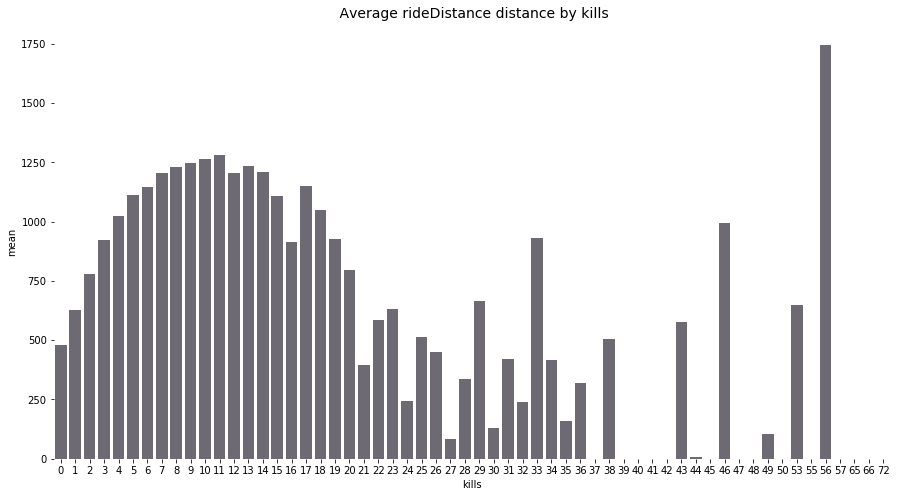

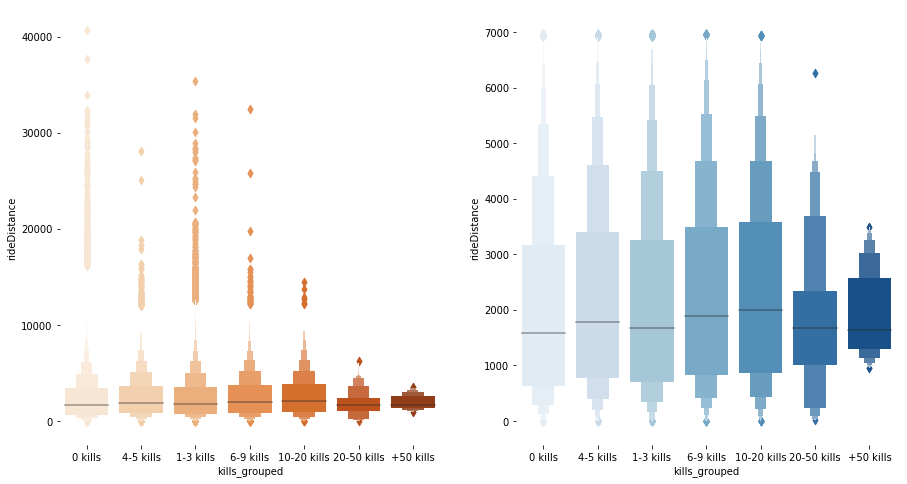

In [73]:
f,ax = plt.subplots(figsize=(15,8))
f0x =  sns.barplot(x='kills',y='mean',data=data.groupby('kills')['rideDistance'].agg(['mean','sum']).reset_index(),palette=['#6D6875'])
sns.despine(bottom=True, left=True)
plt.title(' Average rideDistance distance by kills',fontsize=14);
f,ax = plt.subplots(1,2,figsize=(15,8))
f0x2 = sns.boxenplot(y='rideDistance',data=data[data['rideDistance']>0],x='kills_grouped',palette='Oranges',ax=ax[0])
sns.despine(bottom=True, left=True)
f0x3= sns.boxenplot(y='rideDistance',data=data[(data['rideDistance']>0)&(data['rideDistance']<data['rideDistance'].quantile(0.99))],x='kills_grouped',palette='Blues',ax=ax[1])

### Swimming

In [74]:
data['swimDistance'].describe().to_frame().T

count  mean    std   min   25%   50%   75%      max
swimDistance 4446966.000 4.509 30.502 0.000 0.000 0.000 0.000 3823.000

In [75]:
data['swimDistance'].quantile(0.99)

123.0

In [76]:
data[data['swimDistance']==0]['rideDistance'].describe().to_frame().T

count    mean      std   min   25%   50%   75%       max
rideDistance 4157694.000 579.606 1475.084 0.000 0.000 0.000 0.000 40710.000

In [77]:
data[data['swimDistance']==0]['swimDistance'].count()/data.shape[0]*100

93.49507057171114

In [78]:
# 94% of players didn't swim in single match

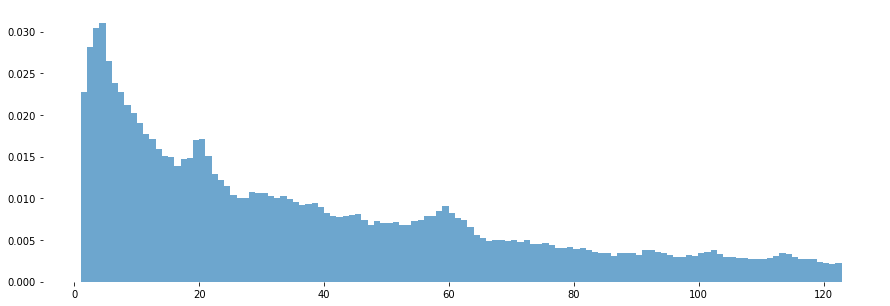

In [79]:
plt.figure(figsize=(15,5))
h5 = data[(data['swimDistance']>1) & (data['swimDistance']<data['swimDistance'].quantile(0.99))]['swimDistance'].hist(bins=122,density=True,alpha=0.65)
h5.grid(False)
sns.despine(bottom=True, left=True)

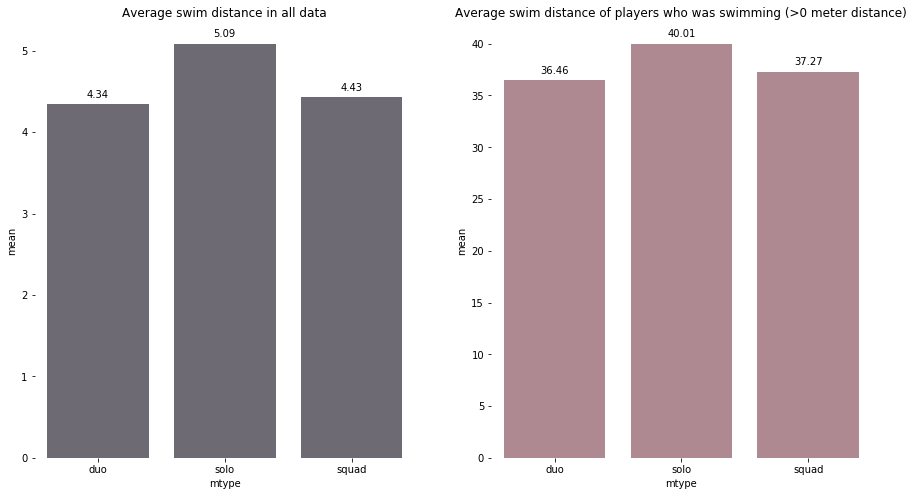

In [80]:
f,ax = plt.subplots(1,2,figsize=(15,8))
g0 =  sns.barplot(x='mtype',y='mean',data=data.groupby('mtype')['swimDistance'].agg(['mean','sum']).reset_index(),palette=['#6D6875'],ax=ax[0])
sns.despine(bottom=True, left=True)
for p in g0.patches:
    g0.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
g1 =  sns.barplot(x='mtype',y='mean',data=data[(data['swimDistance']>0) & (data['swimDistance']<data['swimDistance'].quantile(0.99))].groupby('mtype')['swimDistance'].agg(['mean','sum']).reset_index(),palette=['#B5838D'],ax=ax[1])
sns.despine(bottom=True, left=True)
for p in g1.patches:
    g1.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
g0.set_title('Average swim distance in all data',fontsize=12);
g1.set_title('Average swim distance of players who was swimming (>0 meter distance)',fontsize=12);

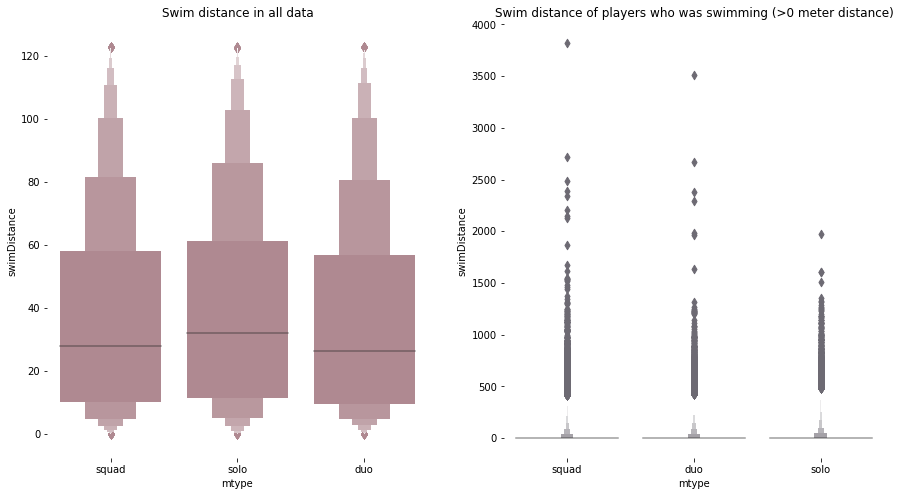

In [81]:
f,ax = plt.subplots(1,2,figsize=(15,8))
df_s = data[(data['swimDistance']>0) & (data['swimDistance']<data['swimDistance'].quantile(0.99))]
g2=sns.boxenplot(y='swimDistance',x='mtype',data=df_s,ax=ax[0],palette=['#B5838D'])
g3=sns.boxenplot(y='swimDistance',x='mtype',data=data,ax=ax[1],palette=['#6D6875'])
sns.despine(bottom=True, left=True)
g2.set_title('Swim distance in all data',fontsize=12);
g3.set_title('Swim distance of players who was swimming (>0 meter distance)',fontsize=12);

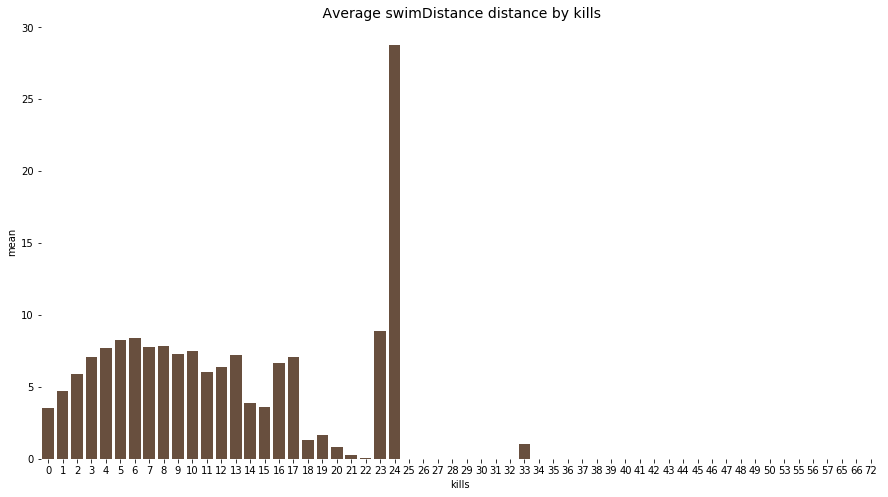

In [82]:
f,ax = plt.subplots(figsize=(15,8))
f0x =  sns.barplot(x='kills',y='mean',data=data.groupby('kills')['swimDistance'].agg(['mean','sum']).reset_index(),palette=['#6f4e37'])
sns.despine(bottom=True, left=True)
plt.title(' Average swimDistance distance by kills',fontsize=14);
f,ax = plt.subplots(1,2,figsize=(15,4))
f0x2 = sns.boxenplot(y='swimDistance',data=df_s,x='kills_grouped',palette='tab20c',ax=ax[0])
sns.despine(bottom=True, left=True)
f0x3= sns.boxenplot(y='rideDistance',data=df_s,x='kills_grouped',palette='tab20b',ax=ax[1])

### Heals

In [83]:
data['heals'].describe().to_frame().T #  Number of healing items used.

count  mean   std   min   25%   50%   75%    max
heals 4446966.000 1.370 2.680 0.000 0.000 0.000 2.000 80.000

In [84]:
data[data['heals']==0]['heals'].describe().to_frame().T

count  mean   std   min   25%   50%   75%   max
heals 2648198.000 0.000 0.000 0.000 0.000 0.000 0.000 0.000

In [85]:
data[data['heals']==0]['heals'].count()/data.shape[0]*100

59.55066892798371

In [86]:
# 59 % percent of players didn't use any healing items.

In [87]:
f,ax = plt.subplots(2,1,figsize=(15,7))
h6 = data['heals'].hist(bins=80,density=True,alpha=0.65,color='g',ax=ax[0])
h6.grid(False)
sns.despine(bottom=True, left=True)
sns.boxplot(data['heals'],ax=ax[1]);

In [88]:
data['heals'].quantile(0.99)

12.0

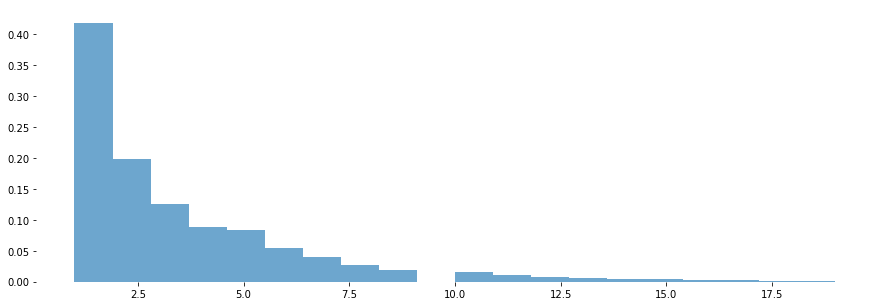

In [89]:
f,ax = plt.subplots(figsize=(15,5))
h7=data[(data['heals']>=1) & (data['heals']<20)]['heals'].hist(bins=20,density=True,alpha=0.65)
h7.grid(False)
sns.despine(bottom=True, left=True)

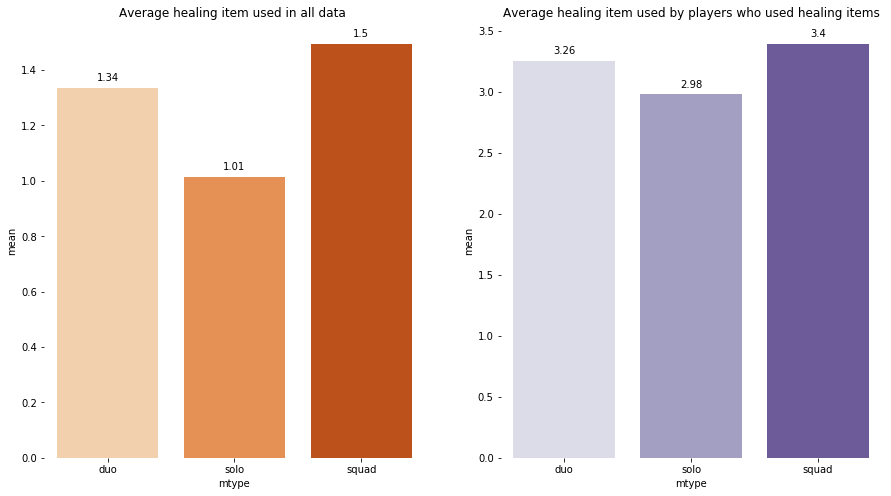

In [90]:
f,ax = plt.subplots(1,2,figsize=(15,8))
i0 =  sns.barplot(x='mtype',y='mean',data=data.groupby('mtype')['heals'].agg(['mean','sum']).reset_index(),palette='Oranges',ax=ax[0])
sns.despine(bottom=True, left=True)
for p in i0.patches:
    i0.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
    
i1 =  sns.barplot(x='mtype',y='mean',data=data[(data['heals']>0) & (data['heals']<20)].groupby('mtype')['heals'].agg(['mean','sum']).reset_index(),palette='Purples',ax=ax[1])
sns.despine(bottom=True, left=True)
for p in i1.patches:
    i1.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
i0.set_title('Average healing item used in all data ',fontsize=12);
i1.set_title('Average healing item used by players who used healing items',fontsize=12);

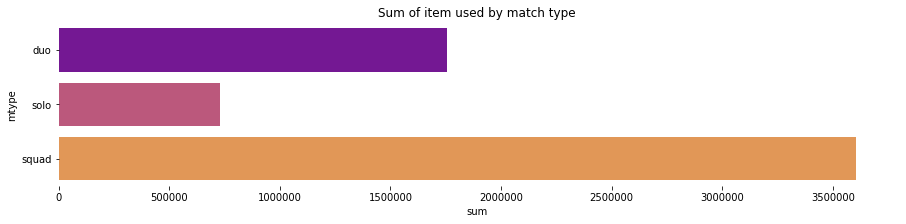

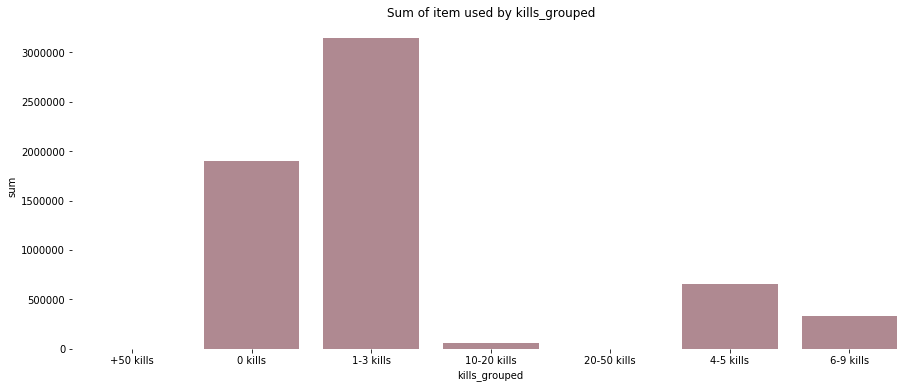

In [91]:
f,ax = plt.subplots(figsize=(15,3))
j0 =  sns.barplot(y='mtype',x='sum',data=data.groupby('mtype')['heals'].agg(['mean','sum']).reset_index(),palette='plasma')
sns.despine(bottom=True, left=True)
j0.set_title('Sum of item used by match type');
f,ax = plt.subplots(figsize=(15,6))
j1 =  sns.barplot(x='kills_grouped',y='sum',data=data.groupby('kills_grouped')['heals'].agg(['mean','sum']).reset_index(),palette=['#B5838D'])
sns.despine(bottom=True, left=True)
j1.set_title('Sum of item used by kills_grouped');

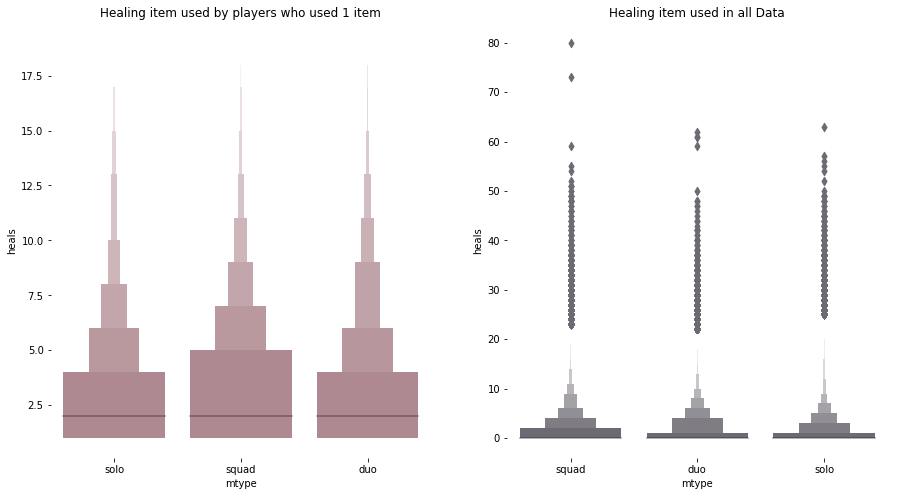

In [92]:
f,ax = plt.subplots(1,2,figsize=(15,8))
df_h = data[(data['heals']>=1) & (data['heals']<20)]
h2=sns.boxenplot(y='heals',x='mtype',data=df_h,ax=ax[0],palette=['#B5838D'])
h3=sns.boxenplot(y='heals',x='mtype',data=data,ax=ax[1],palette=['#6D6875'])
sns.despine(bottom=True, left=True)
h2.set_title('Healing item used by players who used 1 item',fontsize=12);
h3.set_title('Healing item used in all Data',fontsize=12);

In [93]:
f,ax = plt.subplots(2,1,figsize=(15,12))
h0x =  sns.barplot(x='kills',y='mean',data=data.groupby('kills')['heals'].agg(['mean','sum']).reset_index(),palette=['#BAA898'],ax=ax[0])
h0x.set_title(' Average healing items used by kills',fontsize=14);
sns.despine(bottom=True, left=True)
h0xb =  sns.barplot(x='kills',y='sum',data=data.groupby('kills')['heals'].agg(['mean','sum']).reset_index(),palette=['#F2D7EE'],ax=ax[1])
h0xb.set_title(' Sum of healing items used by kills',fontsize=14);
f,ax = plt.subplots(1,2,figsize=(15,4))
plt.title('Distribution of healing item used by kill grouped All data vs Players who used items')
h0x2 = sns.boxenplot(y='heals',data=data,x='kills_grouped',palette='tab20c',ax=ax[0])
sns.despine(bottom=True, left=True)
h0x3= sns.boxenplot(y='heals',data=df_h,x='kills_grouped',palette='tab20b',ax=ax[1])

In [94]:
data['boosts'].describe().to_frame().T #  Number of healing items used.

count  mean   std   min   25%   50%   75%    max
boosts 4446966.000 1.107 1.716 0.000 0.000 0.000 2.000 33.000

In [95]:
data[data['boosts']==0]['boosts'].count()/data.shape[0]*100

56.697622603815724

In [96]:
data['boosts'].quantile(0.99) # 99% of players used less then 8 items 

7.0

In [97]:
# 56% of players didn't use any healing items

In [98]:
f,ax = plt.subplots(1,2,figsize=(15,3))
h8=data['boosts'].hist(bins=30,density=True,alpha=0.65,ax=ax[0])
h8.grid(False)
h8=data[(data['boosts']>=1) & (data['boosts']<=10)]['boosts'].hist(bins=10,density=True,alpha=0.65,ax=ax[1],color='#82204A')
h8.grid(False)
sns.despine(bottom=True, left=True)
plt.suptitle('Distributio of boost items used',fontsize=14);

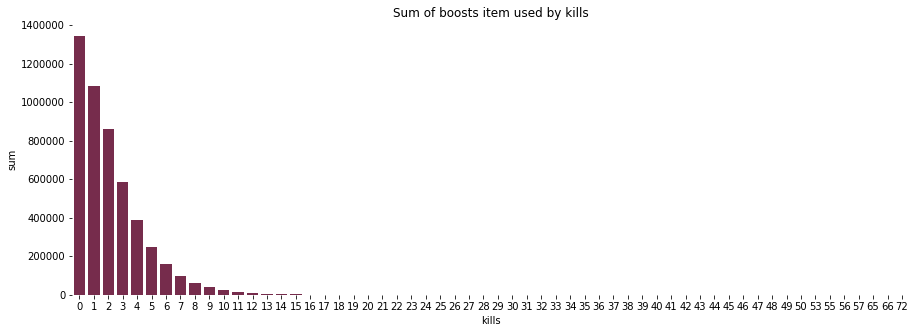

In [99]:
f,ax = plt.subplots(figsize=(15,5))
b0 =  sns.barplot(x='kills_grouped',y='mean',data=data.groupby('kills_grouped')['boosts'].agg(['mean','sum']).reset_index(),palette=['#5C415D'])
sns.despine(bottom=True, left=True)
plt.title(' Average boosts item used by kills_grouped',fontsize=12);
for p in b0.patches:
    b0.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
f,ax = plt.subplots(figsize=(15,5))
b0x =  sns.barplot(x='kills',y='mean',data=data.groupby('kills')['boosts'].agg(['mean','sum']).reset_index(),palette=['#5C415D'])
sns.despine(bottom=True, left=True)
plt.title(' Average boosts item used by kills',fontsize=12);
f,ax = plt.subplots(figsize=(15,5))
b1 =  sns.barplot(x='kills_grouped',y='sum',data=data.groupby('kills_grouped')['boosts'].agg(['mean','sum']).reset_index(),palette=['#82204A'])
sns.despine(bottom=True, left=True)
plt.title('Sum of boosts item used by kills_grouped',fontsize=12);
for p in b0.patches:
    b0.annotate(round(p.get_height(),2), (p.get_x() + p.get_width() / 2, p.get_height()), 
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')
f,ax = plt.subplots(figsize=(15,5))
b1x =  sns.barplot(x='kills',y='sum',data=data.groupby('kills')['boosts'].agg(['mean','sum']).reset_index(),palette=['#82204A'])
sns.despine(bottom=True, left=True)
plt.title('Sum of boosts item used by kills',fontsize=12);

In [104]:
f,ax = plt.subplots(1,2,figsize=(15,7))
df_b = data[(data['boosts']>=1) & (data['boosts']<10)]
h2=sns.boxenplot(y='boosts',x='mtype',data=df_b,ax=ax[0],palette=['#82204A'])
h3=sns.boxenplot(y='boosts',x='mtype',data=data,ax=ax[1],palette=['#82204A'])
sns.despine(bottom=True, left=True)
h2.set_title('Boosts item used by players who used 1 or more items',fontsize=12);
h3.set_title('Boosts item used in all Data',fontsize=12);

In [102]:
data.sample()

Id         groupId         matchId  assists  boosts  \
894556  ac883bb3fc67f1  4abb3d9370354e  39e37f975e39ab        0       0   

        damageDealt  DBNOs  headshotKills  heals  killPlace  ...  teamKills  \
894556        0.000      0              0      0         51  ...          0   

        vehicleDestroys  walkDistance  weaponsAcquired  winPoints  \
894556                0      3040.000                4          0   

       winPlacePerc  kills_grouped  mtype  hs_kill  matchDuration_minutes  
894556        0.710        0 kills   solo    0.000                 32.017  

[1 rows x 33 columns]

In [103]:
#weaponsAcquired

In [105]:
data['weaponsAcquired'].describe().to_frame().T #  weaponsAcquired - Number of weapons picked up.

count  mean   std   min   25%   50%   75%     max
weaponsAcquired 4446966.000 3.660 2.457 0.000 2.000 3.000 5.000 236.000

In [106]:
data[data['weaponsAcquired']==0]['weaponsAcquired'].count()/data.shape[0]*100
# Only 5% of players didn't pick up weapons (maybe afk-er)

5.095114286909322

In [108]:
data['weaponsAcquired'].quantile(0.99)
#99% of players  picked up. max 10 weapons

10.0

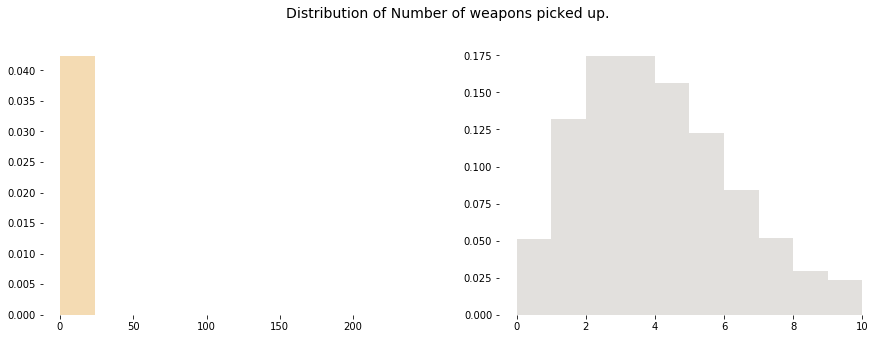

In [111]:
f,ax = plt.subplots(1,2,figsize=(15,5))
h9=data['weaponsAcquired'].hist(density=True,alpha=0.65,ax=ax[0],color='#EFC88B')
h9.grid(False)
h9=data[(data['weaponsAcquired']<=10)]['weaponsAcquired'].hist(bins=10,density=True,alpha=0.65,ax=ax[1],color='#D3D0CB')
h9.grid(False)
sns.despine(bottom=True, left=True)
plt.suptitle('Distribution of Number of weapons picked up.',fontsize=14);